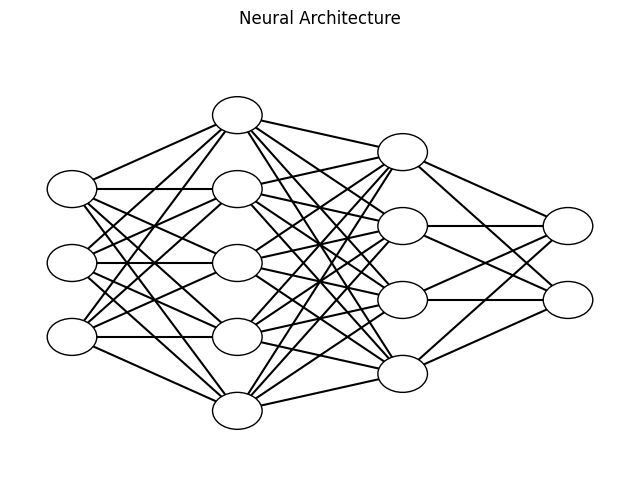

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a simple neural network cartoon using matplotlib.
    ax: matplotlib.axes.AxesSubplot
    left, right, bottom, top: float, boundaries of the drawing
    layer_sizes: list of int, number of neurons in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((left + n*h_spacing, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([left + n*h_spacing, left + (n+1)*h_spacing],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Example usage
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 5, 4, 2])  # 3-input, 5-hidden, 4-hidden, 2-output
plt.title("Neural Architecture")
plt.show()

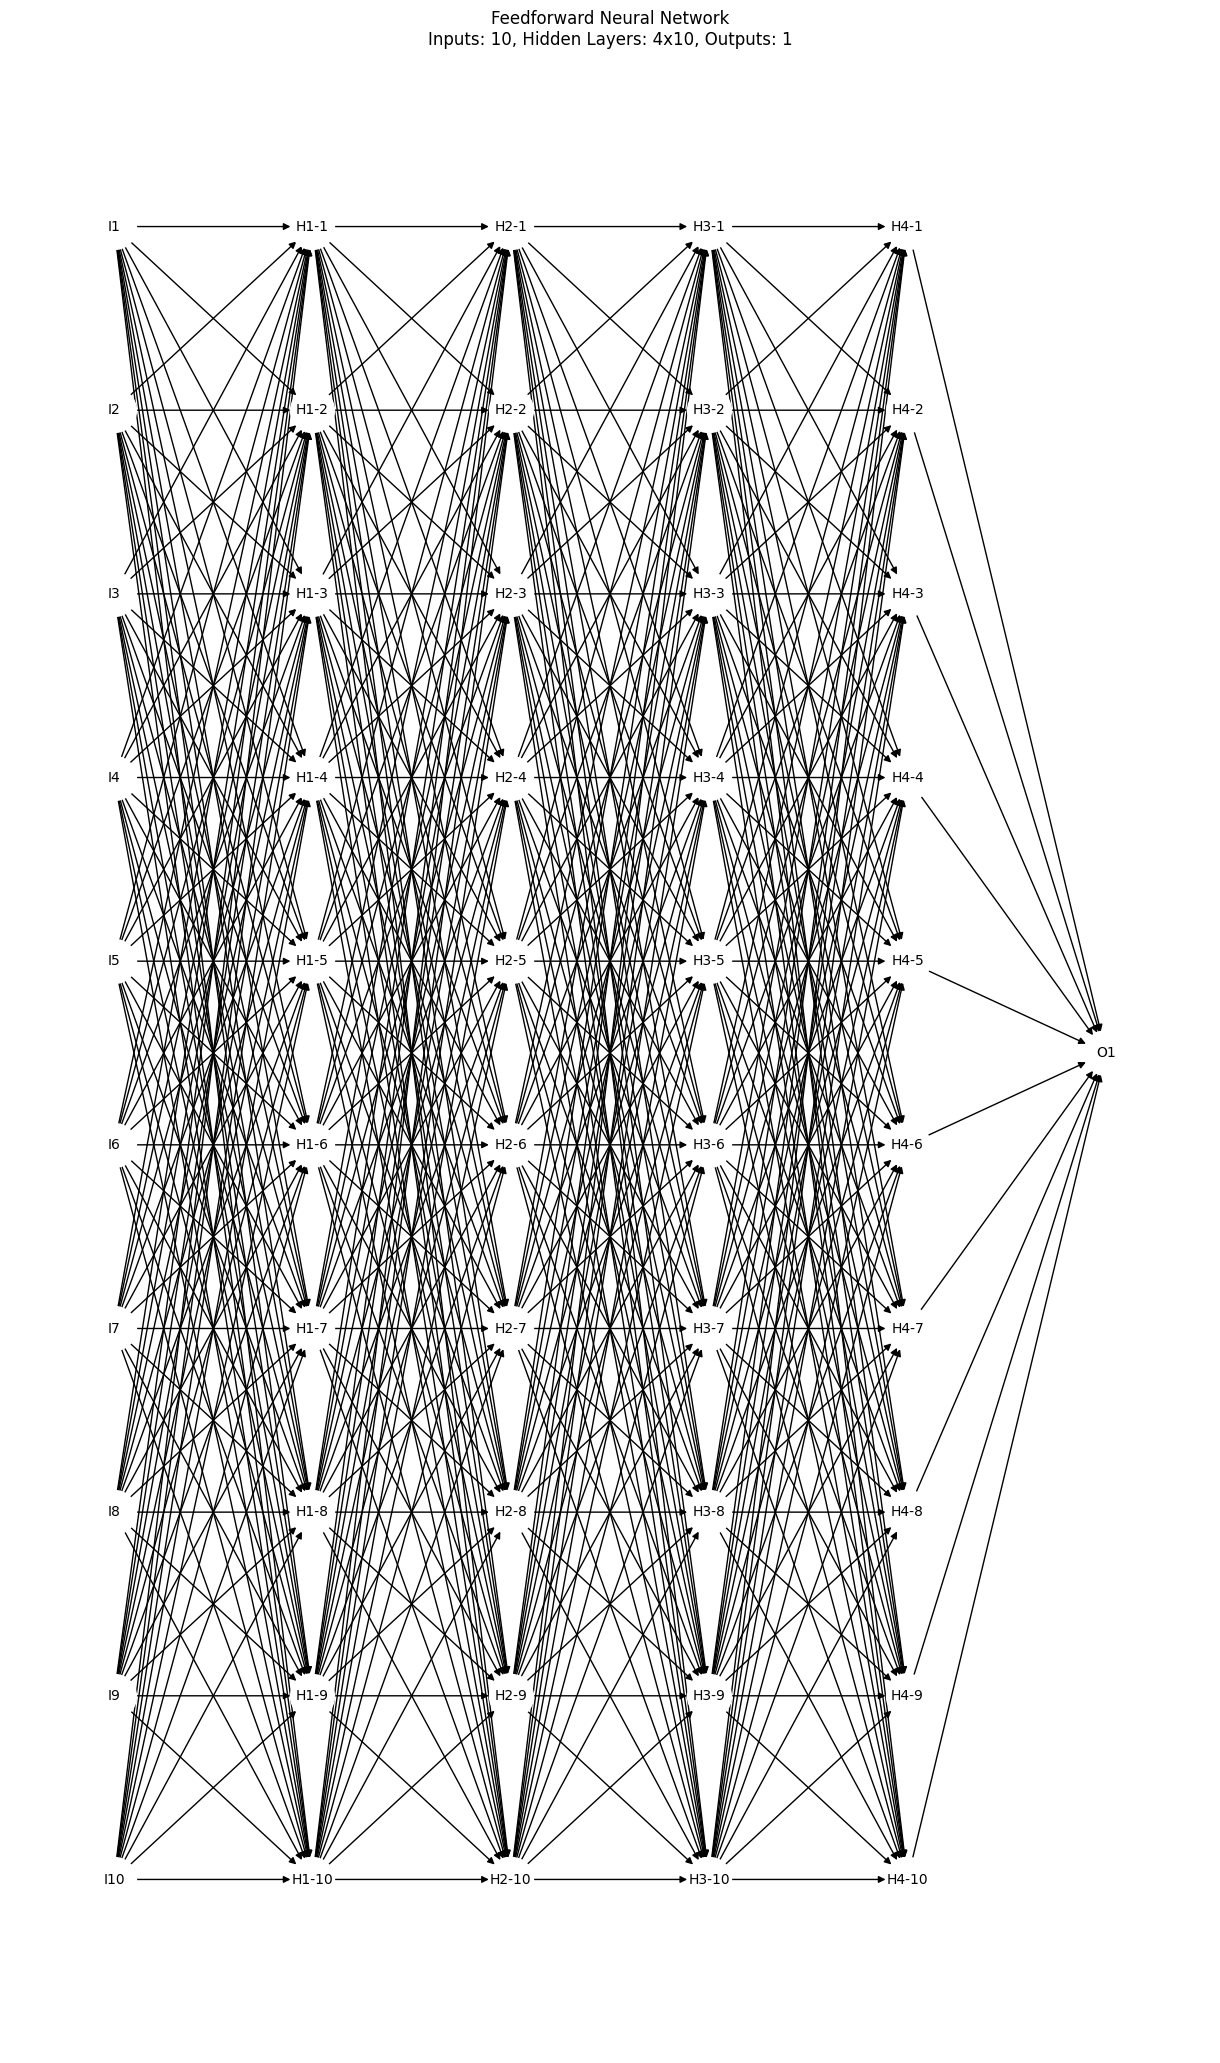

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_nn_graph(num_layers, num_neurons, num_inputs, num_outputs):
    """
    Plots a feedforward neural network using networkx.
    Args:
        num_layers (int): Number of hidden layers.
        num_neurons (int): Number of neurons per hidden layer.
        num_inputs (int): Number of input neurons.
        num_outputs (int): Number of output neurons.
    """
    G = nx.DiGraph()
    layers = [num_inputs] + [num_neurons]*num_layers + [num_outputs]
    node_labels = {}
    pos = {}
    node_count = 0
    y_gap = 1.5

    # Add nodes and positions
    for l, layer_size in enumerate(layers):
        x = l
        y_offset = (layer_size - 1) / 2.0
        for n in range(layer_size):
            node_id = f"L{l}N{n}"
            G.add_node(node_id)
            pos[node_id] = (x, -n + y_offset)
            if l == 0:
                node_labels[node_id] = f"I{n+1}"
            elif l == len(layers)-1:
                node_labels[node_id] = f"O{n+1}"
            else:
                node_labels[node_id] = f"H{l}-{n+1}"

    # Add edges
    for l in range(len(layers)-1):
        for n1 in range(layers[l]):
            for n2 in range(layers[l+1]):
                G.add_edge(f"L{l}N{n1}", f"L{l+1}N{n2}")

    # Draw
    plt.figure(figsize=(2*len(layers), 2*max(layers)))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='w', edge_color='k', font_size=10)
    plt.title(f"Feedforward Neural Network\nInputs: {num_inputs}, Hidden Layers: {num_layers}x{num_neurons}, Outputs: {num_outputs}")
    plt.axis('off')
    plt.show()

# Example usage:
plot_nn_graph(num_layers=4, num_neurons=10, num_inputs=10, num_outputs=1)

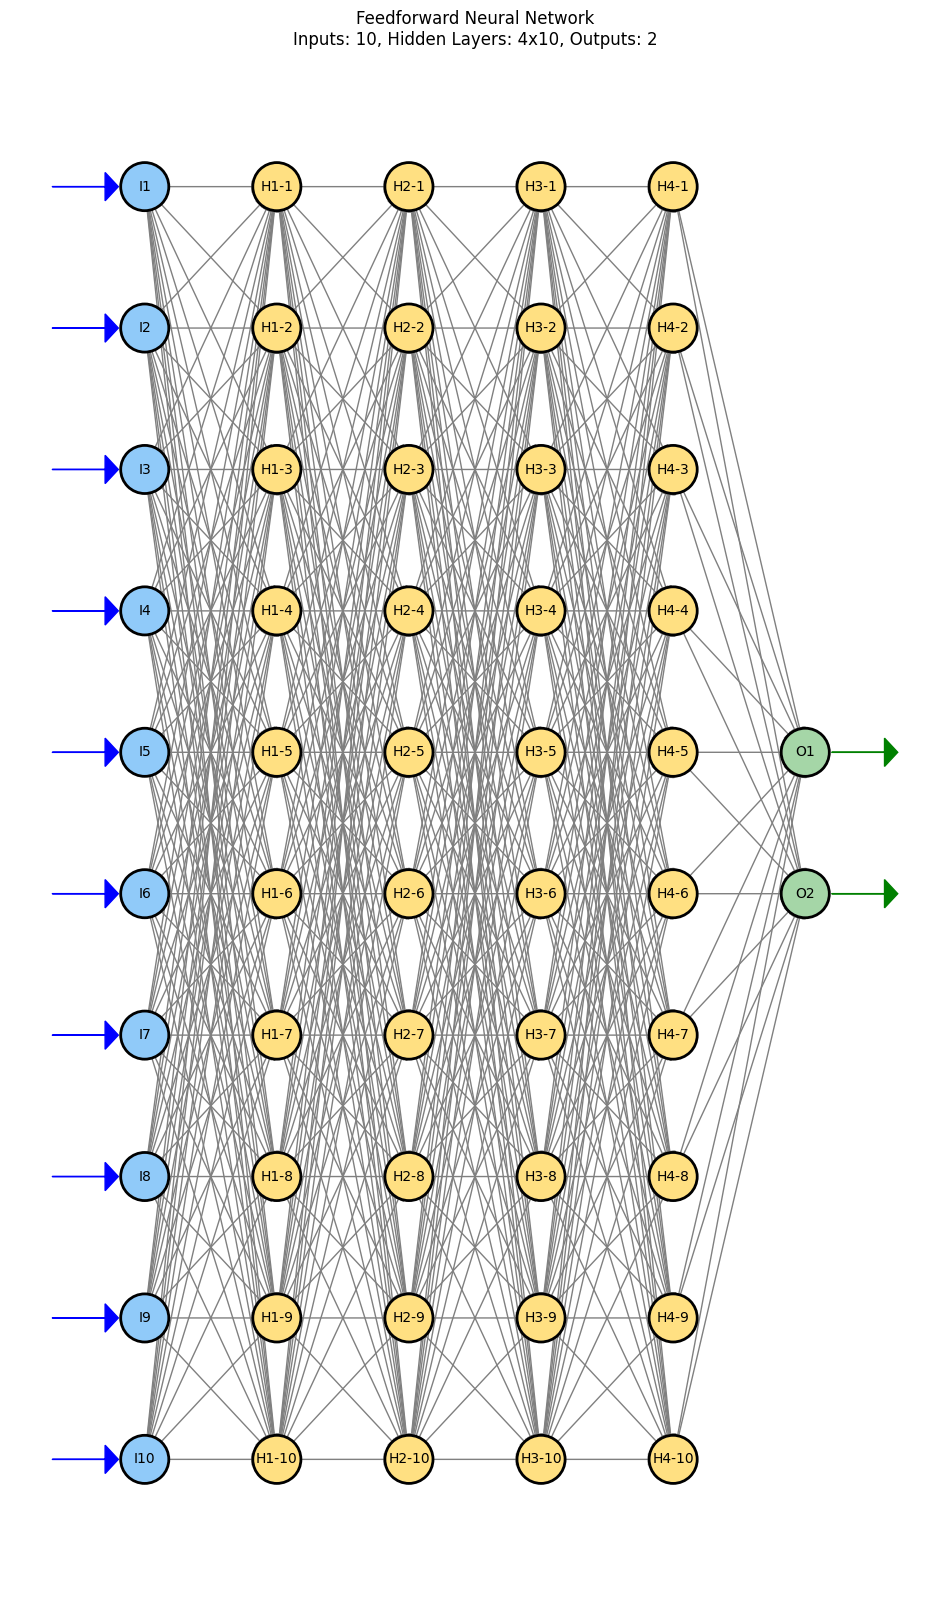

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_nn_graph(num_layers, num_neurons, num_inputs, num_outputs):
    """
    Plots a feedforward neural network using networkx.
    Neurons are circles, edges are arrows, input/output layers have arrows in/out.
    """
    G = nx.DiGraph()
    layers = [num_inputs] + [num_neurons]*num_layers + [num_outputs]
    node_labels = {}
    pos = {}

    # Add nodes and positions
    for l, layer_size in enumerate(layers):
        x = l
        y_offset = (layer_size - 1) / 2.0
        for n in range(layer_size):
            node_id = f"L{l}N{n}"
            G.add_node(node_id)
            pos[node_id] = (x, -n + y_offset)
            if l == 0:
                node_labels[node_id] = f"I{n+1}"
            elif l == len(layers)-1:
                node_labels[node_id] = f"O{n+1}"
            else:
                node_labels[node_id] = f"H{l}-{n+1}"

    # Add edges between layers
    for l in range(len(layers)-1):
        for n1 in range(layers[l]):
            for n2 in range(layers[l+1]):
                G.add_edge(f"L{l}N{n1}", f"L{l+1}N{n2}")

    # Draw nodes with color
    node_colors = []
    for node in G.nodes():
        if node.startswith("L0"):
            node_colors.append("#90caf9")  # blue for input
        elif node.startswith(f"L{len(layers)-1}"):
            node_colors.append("#a5d6a7")  # green for output
        else:
            node_colors.append("#ffe082")  # yellow for hidden

    plt.figure(figsize=(2*len(layers), 2*max(layers)))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200, edgecolors='k', linewidths=2)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

    # Draw arrows for connections
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='gray')

    # Draw input arrow
    for n in range(num_inputs):
        x, y = pos[f"L0N{n}"]
        plt.arrow(x-0.7, y, 0.5, 0, head_width=0.2, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)

    # Draw output arrow
    for n in range(num_outputs):
        x, y = pos[f"L{len(layers)-1}N{n}"]
        plt.arrow(x+0.2, y, 0.5, 0, head_width=0.2, head_length=0.1, fc='green', ec='green', length_includes_head=True)

    plt.title(f"Feedforward Neural Network\nInputs: {num_inputs}, Hidden Layers: {num_layers}x{num_neurons}, Outputs: {num_outputs}")
    plt.axis('off')
    plt.show()

# Example usage:
plot_nn_graph(num_layers=4, num_neurons=10, num_inputs=10, num_outputs=2)

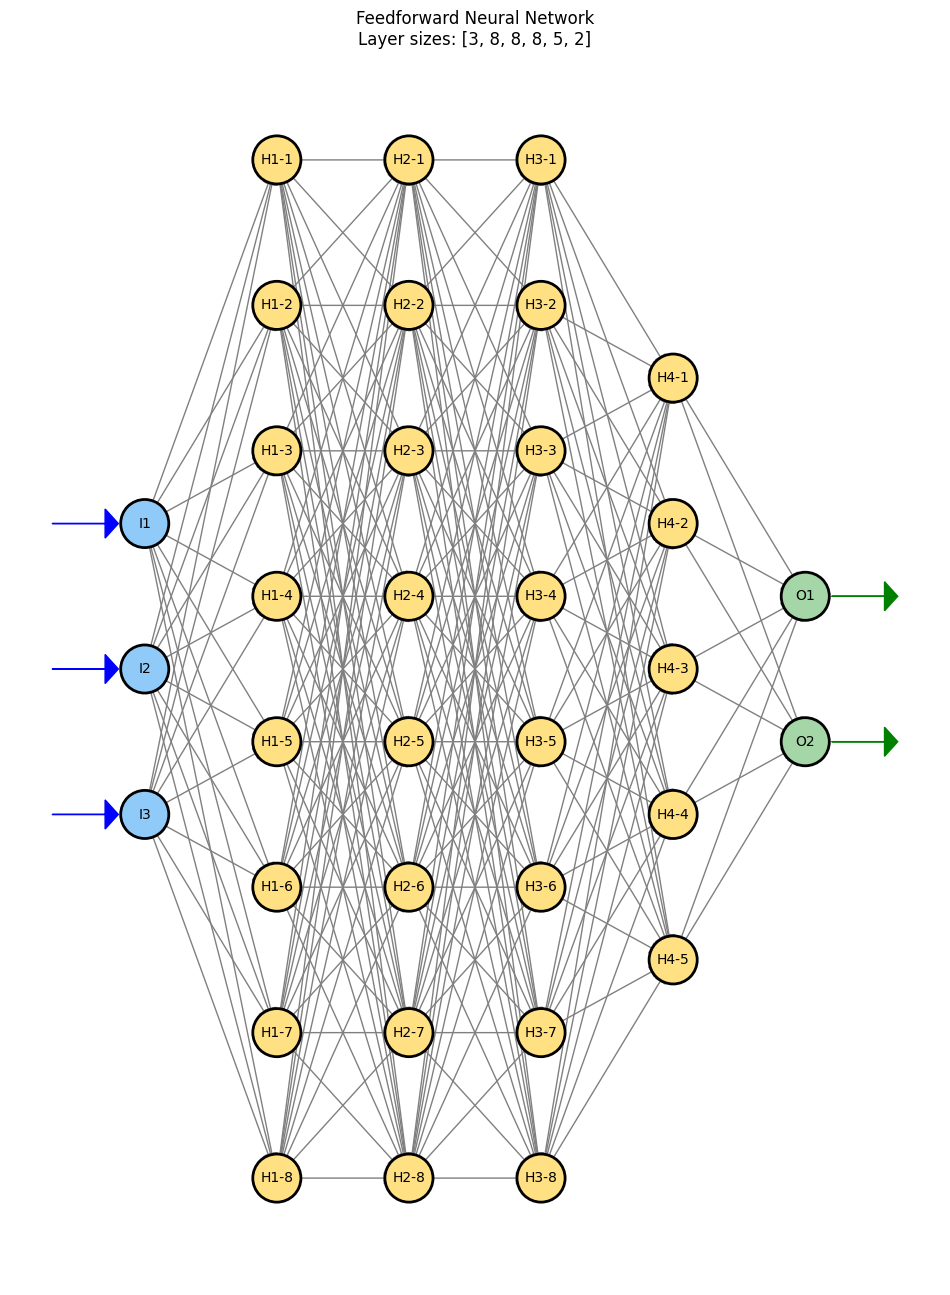

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_nn_graph_by_layers(layer_sizes):
    """
    Plots a feedforward neural network using networkx.
    layer_sizes: list of int, number of neurons in each layer (including input and output)
    Example: [3, 5, 4, 2] means 3-input, 5-hidden, 4-hidden, 2-output
    """
    G = nx.DiGraph()
    node_labels = {}
    pos = {}

    # Add nodes and positions
    for l, layer_size in enumerate(layer_sizes):
        x = l
        y_offset = (layer_size - 1) / 2.0
        for n in range(layer_size):
            node_id = f"L{l}N{n}"
            G.add_node(node_id)
            pos[node_id] = (x, -n + y_offset)
            if l == 0:
                node_labels[node_id] = f"I{n+1}"
            elif l == len(layer_sizes)-1:
                node_labels[node_id] = f"O{n+1}"
            else:
                node_labels[node_id] = f"H{l}-{n+1}"

    # Add edges between layers
    for l in range(len(layer_sizes)-1):
        for n1 in range(layer_sizes[l]):
            for n2 in range(layer_sizes[l+1]):
                G.add_edge(f"L{l}N{n1}", f"L{l+1}N{n2}")

    # Draw nodes with color
    node_colors = []
    for node in G.nodes():
        if node.startswith("L0"):
            node_colors.append("#90caf9")  # blue for input
        elif node.startswith(f"L{len(layer_sizes)-1}"):
            node_colors.append("#a5d6a7")  # green for output
        else:
            node_colors.append("#ffe082")  # yellow for hidden

    plt.figure(figsize=(2*len(layer_sizes), 2*max(layer_sizes)))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1200, edgecolors='k', linewidths=2)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='gray')

    # Draw input arrow
    for n in range(layer_sizes[0]):
        x, y = pos[f"L0N{n}"]
        plt.arrow(x-0.7, y, 0.5, 0, head_width=0.2, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)

    # Draw output arrow
    for n in range(layer_sizes[-1]):
        x, y = pos[f"L{len(layer_sizes)-1}N{n}"]
        plt.arrow(x+0.2, y, 0.5, 0, head_width=0.2, head_length=0.1, fc='green', ec='green', length_includes_head=True)

    plt.title(f"Feedforward Neural Network\nLayer sizes: {layer_sizes}")
    plt.axis('off')
    plt.show()

# Example usage:
plot_nn_graph_by_layers([3, 8, 8,8, 5, 2])